In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(style='whitegrid')
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [3]:
import sklearn
print(sklearn.__version__)

0.22


In [5]:
def stacked_bar(df, x='rating', y='flagged', ref='reviewID', title=None):
    a = df[x].sort_values().unique()
    b = df[y].unique()
    df_1 = df.groupby([x,y])[ref].count()
    df_2 = pd.DataFrame(index=a)
    for j in b:
        c = []
        for i in a:
            c.append(df_1[i][j])
        df_2[j] = c
    df_2.plot(kind='bar', stacked=True); plt.grid(); plt.title(title)

In [6]:
#load the dataset (review and reviewer and hotel)processed in project1 notebook file
df_review = pd.read_csv('new_review.csv')
df_reviewer = pd.read_csv('new_reviewer.csv')
df_hotel = pd.read_csv('new_hotel.csv')

In [9]:
# function to convert the gap time( the difference in time between every consecutive comments made by the reviewer)
# from string into the int
df_reviewer['reviewer_gap_times'] = df_reviewer['gap_times'].apply(lambda x: np.int_(re.findall(r'\d+',x)))
df_reviewer['reviewer_ratings'] = df_reviewer['ratings'].apply(lambda x: np.int_(re.findall(r'\d+',x)))

In [10]:
# lambda function to calculate the quantile information, meantime, standard deviation, pct0(percentage of zero 
#comment made by the reviewer) reviewer_pctRatings( nymber of each rating(1,2,3,4,5) made by the reviewer)
df_reviewer['reviewer_quantiles'] = df_reviewer['reviewer_gap_times'].apply(
    lambda x: np.quantile(x, [0., 0.25, 0.5, 0.75, 1.]) if x.size else [0.]*5)
df_reviewer['reviewer_meanTime'] = df_reviewer['reviewer_gap_times'].apply(
    lambda x: np.mean(x) if x.size else 0.)
df_reviewer['reviewer_stdTime'] = df_reviewer['reviewer_gap_times'].apply(
    lambda x: np.std(x) if x.size else 0.)
df_reviewer['reviewer_pct0'] = df_reviewer['reviewer_gap_times'].apply(
    lambda x: sum(x==0)/len(x) if x.size else 0.)
df_reviewer['reviewer_pctRatings'] = df_reviewer['reviewer_ratings'].apply(
    lambda x: np.array([sum(x==i) for i in range(1,6)])/len(x) if x.size else [0.]*5)

In [11]:
# lambda function to gap time between 1 to zero
df_reviewer['gap_times_norm'] = df_reviewer['reviewer_gap_times'].apply(lambda x : x/np.linalg.norm(x))
# lambda function to calculate quantile from gaptime norm
df_reviewer['quantiles_norm'] = df_reviewer['gap_times_norm'].apply(
    lambda x: np.quantile(x, [0., 0.25, 0.5, 0.75, 1.]) if x.size else [0.]*5)
# lambda function to calculate mean time norm 
df_reviewer['meanTime_norm'] = df_reviewer['gap_times_norm'].apply(
    lambda x: np.mean(x) if x.size else 0.)
# lambda function to calculate str time from norm gap time of the user
df_reviewer['stdTime_norm'] = df_reviewer['gap_times_norm'].apply(
    lambda x: np.std(x) if x.size else 0.)


/home/rudresh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [12]:
# to check all the null value and replace it with zero if found
df_reviewer['meanTime_norm'] = df_reviewer['meanTime_norm'] .apply(lambda x: 0 if pd.isna(x) else x)
df_reviewer['stdTime_norm'] = df_reviewer['stdTime_norm'] .apply(lambda x: 0 if pd.isna(x) else x)

In [13]:
df_reviewer.loc[0]

index                                                                  0
location                                                  Oconomowoc, WI
yelpJoinDate                                                  2011-05-01
rating                                                           3.32558
reviewCount                                                           86
gap_times              [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 ...
ratings                [4 5 1 2 4 2 4 3 3 4 4 1 1 5 4 2 4 2 5 5 2 5 4...
flags                  [False False False False False False False Fal...
pctTrue                                                         0.151163
reviewerID                                        yevHGEUQQmnVlBXIrJ885A
reviewer_gap_times     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
reviewer_ratings       [4, 5, 1, 2, 4, 2, 4, 3, 3, 4, 4, 1, 1, 5, 4, ...
reviewer_quantiles                            [0.0, 0.0, 0.0, 6.0, 55.0]
reviewer_meanTime                                  

In [14]:
# function to calculate number of zero present in gap time
df_reviewer['reviewer_gap_zero_counts'] = df_reviewer['reviewer_gap_times'].apply(lambda x : np.log(x.tolist().count(0))+1)
df_reviewer['reviewer_gap_zero_counts'] = df_reviewer['reviewer_gap_zero_counts'].apply(lambda x: 0 if np.isinf(x) else x)

In [15]:
# create a new feature which represent categorical count of ratingd 1,2,3,4,5
# for eg rating_counts1 contians value 1 for the every row where user gave 1 rating as feedback to the business else zero
df_reviewer['ratings_counts1'] = df_reviewer['reviewer_ratings'].apply(lambda x : x.tolist().count(1))
df_reviewer['ratings_counts2'] = df_reviewer['reviewer_ratings'].apply(lambda x : x.tolist().count(2))
df_reviewer['ratings_counts3'] = df_reviewer['reviewer_ratings'].apply(lambda x : x.tolist().count(3))
df_reviewer['ratings_counts4'] = df_reviewer['reviewer_ratings'].apply(lambda x : x.tolist().count(4))
df_reviewer['ratings_counts5'] = df_reviewer['reviewer_ratings'].apply(lambda x : x.tolist().count(5))

In [16]:
# create a new dataframe onehot_reviewer
onehot_reviewer = df_reviewer[['reviewerID','rating','reviewCount','pctTrue','reviewer_meanTime','reviewer_stdTime','reviewer_pct0','reviewer_gap_zero_counts','ratings_counts1','ratings_counts2','ratings_counts3','ratings_counts4','ratings_counts5','meanTime_norm','stdTime_norm']]

In [17]:
onehot_reviewer.loc[0]

reviewerID                  yevHGEUQQmnVlBXIrJ885A
rating                                     3.32558
reviewCount                                     86
pctTrue                                   0.151163
reviewer_meanTime                          5.67059
reviewer_stdTime                           11.1939
reviewer_pct0                             0.564706
reviewer_gap_zero_counts                    4.8712
ratings_counts1                                  9
ratings_counts2                                 17
ratings_counts3                                 17
ratings_counts4                                 23
ratings_counts5                                 20
meanTime_norm                            0.0490157
stdTime_norm                             0.0967583
Name: 0, dtype: object

In [18]:
#perform feature enginnering on hotel dataset

In [19]:
## lambda function to calculate the quantile information, meantime, standard deviation, pct0(percentage of zero 
#comment made on the hotel) reviewer_pctRatings( nymber of each rating(1,2,3,4,5) )
df_hotel['hotel_gap_times'] = df_hotel['gap_times'].apply(lambda x: np.int_(re.findall(r'\d+',x)))
df_hotel['hotel_ratings'] = df_hotel['ratings'].apply(lambda x: np.int_(re.findall(r'\d+',x)))


df_hotel['hotel_quantiles'] = df_hotel['hotel_gap_times'].apply(
    lambda x: np.quantile(x, [0., 0.25, 0.5, 0.75, 1.]) if x.size else [0.]*5)
df_hotel['hotel_meanTime'] = df_hotel['hotel_gap_times'].apply(
    lambda x: np.mean(x) if x.size else 0.)
df_hotel['hotel_stdTime'] = df_hotel['hotel_gap_times'].apply(
    lambda x: np.std(x) if x.size else 0.)
df_hotel['hotel_pct0'] = df_hotel['hotel_gap_times'].apply(
    lambda x: sum(x==0)/len(x) if x.size else 0.)
df_hotel['hotel_pctRatings'] = df_hotel['hotel_ratings'].apply(
    lambda x: np.array([sum(x==i) for i in range(1,6)])/len(x) if x.size else [0.]*5)

In [20]:

df_hotel['hotel_gap_zero_counts'] = df_hotel['hotel_gap_times'].apply(lambda x : np.log(x.tolist().count(0))+1)
df_hotel['hotel_gap_zero_counts'] = df_hotel['hotel_gap_zero_counts'] .apply(lambda x: 0 if np.isinf(x) else x)

In [21]:
# create a new feature which represent categorical count of ratingd 1,2,3,4,5
# for eg rating_counts1 contians value 1 for the every row where user gave 1 rating as feedback to the business else zero

df_hotel['hotel_ratings_counts1'] = df_hotel['hotel_ratings'].apply(lambda x : x.tolist().count(1))
df_hotel['hotel_ratings_counts2'] = df_hotel['hotel_ratings'].apply(lambda x : x.tolist().count(2))
df_hotel['hotel_ratings_counts3'] = df_hotel['hotel_ratings'].apply(lambda x : x.tolist().count(3))
df_hotel['hotel_ratings_counts4'] = df_hotel['hotel_ratings'].apply(lambda x : x.tolist().count(4))
df_hotel['hotel_ratings_counts5'] = df_hotel['hotel_ratings'].apply(lambda x : x.tolist().count(5))

In [22]:
# lambda function to gap time between 1 to zero
df_hotel['hotel_gap_times_norm'] = df_hotel['hotel_gap_times'].apply(lambda x : x/np.linalg.norm(x))
# lambda function to calculate quantile from gaptime norm
df_hotel['hotel_quantiles_norm'] = df_hotel['hotel_gap_times_norm'].apply(
    lambda x: np.quantile(x, [0., 0.25, 0.5, 0.75, 1.]) if x.size else [0.]*5)
# lambda function to calculate mean time norm 
df_hotel['hotel_meanTime_norm'] = df_hotel['hotel_gap_times_norm'].apply(
    lambda x: np.mean(x) if x.size else 0.)
# lambda function to calculate str time from norm gap time of the user
df_hotel['hotel_stdTime_norm'] = df_hotel['hotel_gap_times_norm'].apply(
    lambda x: np.std(x) if x.size else 0.)

In [23]:
df_hotel['hotel_meanTime_norm'] = df_hotel['hotel_meanTime_norm'] .apply(lambda x: 0 if pd.isna(x) else x)
df_hotel['hotel_stdTime_norm'] = df_hotel['hotel_stdTime_norm'] .apply(lambda x: 0 if pd.isna(x) else x)

In [24]:
df_hotel.rename(columns={'rating': 'hote_rating_overall', 'reviewCount': 'hote_count_overall','pctTrue':'hote_pct_true'}, inplace=True)

In [25]:
df_hotel.loc[3]

index                                                                    3
location                                                       Chicago, IL
hote_rating_overall                                                2.07143
hote_count_overall                                                      28
gap_times                [  2   0 143 309  51 396 302   0 181  13 441  ...
ratings                  [4 4 4 1 1 1 3 3 3 1 1 3 2 1 1 2 1 3 1 3 3 2 3...
flags                    [False False False False False False False Fal...
hote_pct_true                                                     0.214286
hotelID                                             2nnXespKBBNtDQTtrumNFg
hotel_gap_times          [2, 0, 143, 309, 51, 396, 302, 0, 181, 13, 441...
hotel_ratings            [4, 4, 4, 1, 1, 1, 3, 3, 3, 1, 1, 3, 2, 1, 1, ...
hotel_quantiles                             [0.0, 5.0, 27.0, 108.5, 441.0]
hotel_meanTime                                                     87.9259
hotel_stdTime            

In [26]:
#create dataframe one_hotel
onehot_hotel = df_hotel[['hotelID','hote_rating_overall','hote_count_overall','hote_pct_true','hotel_meanTime','hotel_stdTime','hotel_pct0','hotel_gap_zero_counts','hotel_ratings_counts1','hotel_ratings_counts2','hotel_ratings_counts3','hotel_ratings_counts4','hotel_ratings_counts5','hotel_meanTime_norm','hotel_stdTime_norm']]

In [27]:
onehot_hotel.loc[0]

hotelID                  pSLh_XyV_3QS1hNsBOGHiQ
hote_rating_overall                         2.6
hote_count_overall                            5
hote_pct_true                                 1
hotel_meanTime                            251.5
hotel_stdTime                           196.559
hotel_pct0                                    0
hotel_gap_zero_counts                         0
hotel_ratings_counts1                         2
hotel_ratings_counts2                         0
hotel_ratings_counts3                         1
hotel_ratings_counts4                         2
hotel_ratings_counts5                         0
hotel_meanTime_norm                    0.393956
hotel_stdTime_norm                     0.307894
Name: 0, dtype: object

In [28]:
# feature engineering on the reviews dataset to extract the different feature from them like
# positive, negative, neutral, compound

In [29]:
# we use nltk sentinment intensity library to detect different sentiment from the text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [31]:
df_review['reviewContent_sent'] = df_review['reviewContent'] .apply(lambda x: sid.polarity_scores(str(x)))


In [33]:
# it depicts the different sentiment feature from text
df_review['reviewContent_compound'] = df_review['reviewContent_sent'].apply(lambda x: x['compound'])
df_review['reviewContent_pos'] = df_review['reviewContent_sent'].apply(lambda x: x['pos'])
df_review['reviewContent_neg'] = df_review['reviewContent_sent'].apply(lambda x: x['neg'])
df_review['reviewContent_neu'] = df_review['reviewContent_sent'].apply(lambda x: x['neu'])
# the log of the worcount in every review
df_review['log_wordsCount'] = np.log(df_review['wordsCount']+1)

In [34]:
# to categorize the column into numerical catgorical column.
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

# to categorize the week
df_review['weekDay_categorized'] = lb_make.fit_transform(df_review['weekDay'])

In [35]:
df_review.loc[0]

Unnamed: 0                                                                0
date                                                             2011-06-08
reviewID                                                       MyNjnxzZVTPq
reviewerID                                           IFTr6_6NI4CgCVavIL9k5g
reviewContent             Let me begin by saying that there are two kind...
rating                                                                    5
usefulCount                                                              18
coolCount                                                                11
funnyCount                                                               28
flagged                                                               False
hotelID                                              tQfLGoolUMu2J0igcWcoZg
weekDay                                                           Wednesday
wordsCount                                                              419
reviewConten

In [36]:
onehot = pd.get_dummies(df_review, columns=['rating','weekDay_categorized'])

In [37]:
onehot.dtypes

Unnamed: 0                  int64
date                       object
reviewID                   object
reviewerID                 object
reviewContent              object
usefulCount                 int64
coolCount                   int64
funnyCount                  int64
flagged                      bool
hotelID                    object
weekDay                    object
wordsCount                  int64
reviewContent_sent         object
reviewContent_compound    float64
reviewContent_pos         float64
reviewContent_neg         float64
reviewContent_neu         float64
log_wordsCount            float64
rating_1                    uint8
rating_2                    uint8
rating_3                    uint8
rating_4                    uint8
rating_5                    uint8
weekDay_categorized_0       uint8
weekDay_categorized_1       uint8
weekDay_categorized_2       uint8
weekDay_categorized_3       uint8
weekDay_categorized_4       uint8
weekDay_categorized_5       uint8
weekDay_catego

In [38]:
onehot_review = onehot.drop(columns=['Unnamed: 0', 'date', 'reviewContent', 'hotelID', 'weekDay',
                          'wordsCount','reviewContent_sent','reviewID','reviewerID'], axis=1)


In [40]:
onehot_review = onehot.drop(columns=['Unnamed: 0', 'date', 'reviewContent', 'weekDay',
                          'wordsCount','reviewContent_sent'], axis=1)

In [50]:
onehot_review.loc[0]

reviewID                            MyNjnxzZVTPq
reviewerID                IFTr6_6NI4CgCVavIL9k5g
usefulCount                                   18
coolCount                                     11
funnyCount                                    28
flagged                                    False
hotelID                   tQfLGoolUMu2J0igcWcoZg
reviewContent_compound                    0.6881
reviewContent_pos                           0.09
reviewContent_neg                          0.083
reviewContent_neu                          0.827
log_wordsCount                           6.04025
rating_1                                       0
rating_2                                       0
rating_3                                       0
rating_4                                       0
rating_5                                       1
weekDay_categorized_0                          0
weekDay_categorized_1                          0
weekDay_categorized_2                          0
weekDay_categorized_

In [41]:
# to merged all the review, reviwer and hotel dataset into one dataset
df_merged_onehot = onehot_review.merge(onehot_hotel, on='hotelID', how='inner', suffixes=('_',''))


df_merged_onehot = df_merged_onehot.merge(onehot_reviewer, on='reviewerID', how='inner', suffixes=('_r','_h'))

df_merged_onehot = df_merged_onehot.drop(columns=['reviewID', 
                        'reviewerID',
                        'hotelID'])

# after running the random forest keep the normalized column and remove original column
df_merged_onehot = df_merged_onehot.drop(columns=['hotel_meanTime','hotel_stdTime','reviewer_meanTime','reviewer_stdTime'])

df_merged_onehot.loc[0]

usefulCount                       18
coolCount                         11
funnyCount                        28
flagged                        False
reviewContent_compound        0.6881
reviewContent_pos               0.09
reviewContent_neg              0.083
reviewContent_neu              0.827
log_wordsCount               6.04025
rating_1                           0
rating_2                           0
rating_3                           0
rating_4                           0
rating_5                           1
weekDay_categorized_0              0
weekDay_categorized_1              0
weekDay_categorized_2              0
weekDay_categorized_3              0
weekDay_categorized_4              0
weekDay_categorized_5              0
weekDay_categorized_6              1
hote_rating_overall                3
hote_count_overall                15
hote_pct_true               0.333333
hotel_pct0                  0.285714
hotel_gap_zero_counts        2.38629
hotel_ratings_counts1              6
h

In [42]:
# check the null value
df_merged_onehot.isnull().sum()

usefulCount                 0
coolCount                   0
funnyCount                  0
flagged                     0
reviewContent_compound      0
reviewContent_pos           0
reviewContent_neg           0
reviewContent_neu           0
log_wordsCount              0
rating_1                    0
rating_2                    0
rating_3                    0
rating_4                    0
rating_5                    0
weekDay_categorized_0       0
weekDay_categorized_1       0
weekDay_categorized_2       0
weekDay_categorized_3       0
weekDay_categorized_4       0
weekDay_categorized_5       0
weekDay_categorized_6       0
hote_rating_overall         0
hote_count_overall          0
hote_pct_true               0
hotel_pct0                  0
hotel_gap_zero_counts       0
hotel_ratings_counts1       0
hotel_ratings_counts2       0
hotel_ratings_counts3       0
hotel_ratings_counts4       0
hotel_ratings_counts5       0
hotel_meanTime_norm         0
hotel_stdTime_norm          0
rating    

In [10]:
# save all the extracted features into df_merged_onehot.csv
df_merged_onehot.to_csv('df_merged_onehot.csv')

In [4]:
# load data from here to skip the data preprocessing part
df_merged_onehot = pd.read_csv('df_merged_onehot.csv')
df_merged_onehot = df_merged_onehot.drop(columns=['Unnamed: 0'])

In [6]:
df_merged_onehot = df_merged_onehot.drop(columns=['Unnamed: 0.1'])

In [7]:
df_merged_onehot.dtypes

usefulCount                   int64
coolCount                     int64
funnyCount                    int64
flagged                        bool
reviewContent_compound      float64
reviewContent_pos           float64
reviewContent_neg           float64
reviewContent_neu           float64
log_wordsCount              float64
rating_1                      int64
rating_2                      int64
rating_3                      int64
rating_4                      int64
rating_5                      int64
weekDay_categorized_0         int64
weekDay_categorized_1         int64
weekDay_categorized_2         int64
weekDay_categorized_3         int64
weekDay_categorized_4         int64
weekDay_categorized_5         int64
weekDay_categorized_6         int64
hote_rating_overall         float64
hote_count_overall            int64
hote_pct_true               float64
hotel_pct0                  float64
hotel_gap_zero_counts       float64
hotel_ratings_counts1         int64
hotel_ratings_counts2       

/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.01174478 0.00955498 0.00859852 0.01013568 0.01111662 0.00986708
 0.01028398 0.01276693 0.00159955 0.00191206 0.00292782 0.0038419
 0.00508874 0.00370517 0.00429643 0.00357683 0.00365182 0.00384581
 0.00398703 0.00397202 0.02560579 0.03431351 0.42225883 0.00697456
 0.0197251  0.0067618  0.02048429 0.030129   0.03406373 0.0128084
 0.03447705 0.05108979 0.00938516 0.00930164 0.07534807 0.00967186
 0.00869083 0.00857921 0.0087871  0.00902181 0.00899572 0.00908813
 0.00914385 0.00882104]


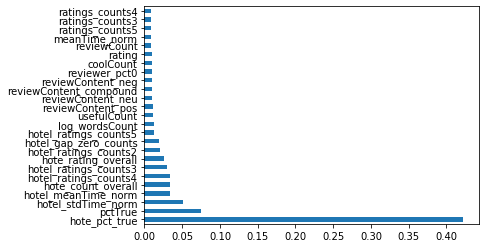

In [5]:
#  to find the most influencial features within our preprocessed data

y = df_merged_onehot['flagged']
X = df_merged_onehot.drop(columns='flagged')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [9]:
df_merged_onehot = df_merged_onehot.drop(columns=['hote_pct_true','pctTrue'])

[0.0222364  0.01782901 0.01642165 0.0237413  0.02428316 0.02238377
 0.02413681 0.02663761 0.00178715 0.00310942 0.00503459 0.00562131
 0.00504938 0.00716136 0.00835855 0.0070029  0.00741628 0.00755268
 0.00795449 0.00775817 0.03412368 0.06399939 0.01299952 0.01763883
 0.01275476 0.02701385 0.0478118  0.06346498 0.03473541 0.08693128
 0.11719336 0.02210242 0.02138473 0.02203297 0.02002433 0.01988219
 0.02015388 0.02103908 0.02063851 0.020992   0.02126075 0.02034626]


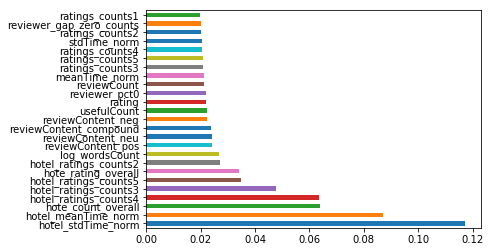

In [10]:
#  to find the most influencial features within our preprocessed data
# here we anlysed the importance feature by removing the hotel_pct_true and pct_true columns

y = df_merged_onehot['flagged']
X = df_merged_onehot.drop(columns='flagged')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [11]:
feat_importances.sort_values(ascending=False)

hotel_stdTime_norm          0.117193
hotel_meanTime_norm         0.086931
hote_count_overall          0.063999
hotel_ratings_counts4       0.063465
hotel_ratings_counts3       0.047812
hotel_ratings_counts5       0.034735
hote_rating_overall         0.034124
hotel_ratings_counts2       0.027014
log_wordsCount              0.026638
reviewContent_pos           0.024283
reviewContent_neu           0.024137
reviewContent_compound      0.023741
reviewContent_neg           0.022384
usefulCount                 0.022236
rating                      0.022102
reviewer_pct0               0.022033
reviewCount                 0.021385
meanTime_norm               0.021261
ratings_counts3             0.021039
ratings_counts5             0.020992
ratings_counts4             0.020639
stdTime_norm                0.020346
ratings_counts2             0.020154
reviewer_gap_zero_counts    0.020024
ratings_counts1             0.019882
coolCount                   0.017829
hotel_gap_zero_counts       0.017639
f

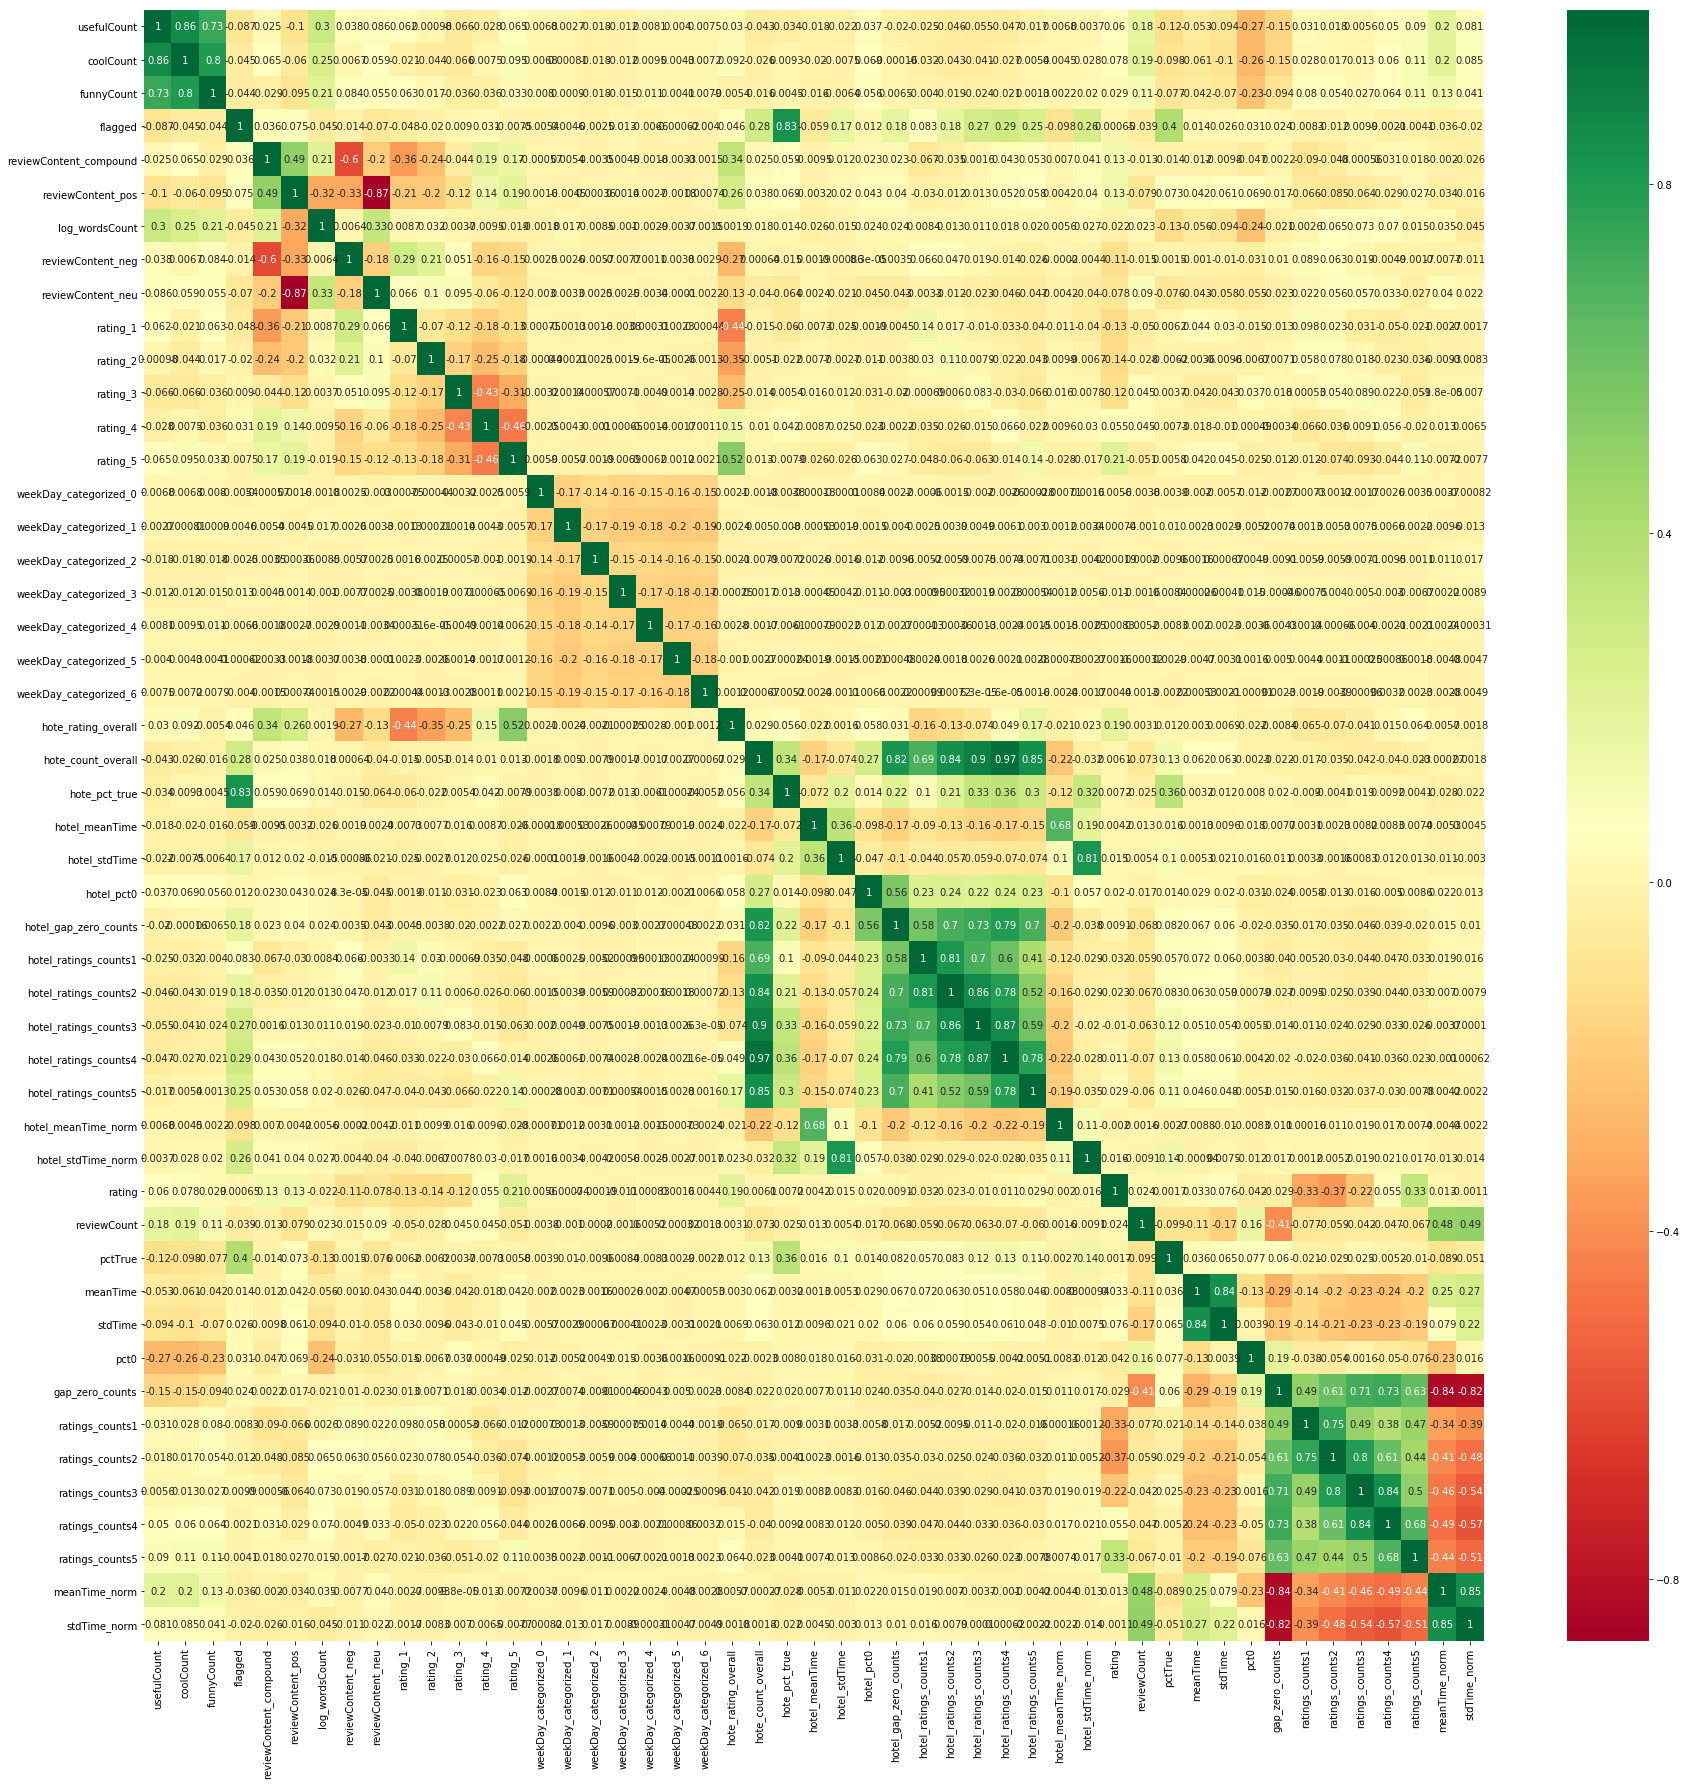

In [300]:
#get correlations of each features in dataset
corrmat = df_merged_onehot.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df_merged_onehot[top_corr_features].corr(),annot=True,cmap="RdYlGn")

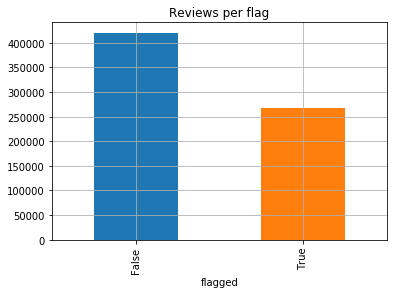

In [52]:
# Amount of reviews per flag.
plt.figure(); df_merged_onehot['flagged'].groupby(df_merged_onehot['flagged']).count().plot(kind="bar"); 
plt.title('Reviews per flag'); plt.grid(); plt.show()

In [83]:
#our data set is biased towards the false review more

In [84]:
# to explore the property of the true review

In [7]:
print('number of True reviews ',df_merged_onehot[df_merged_onehot['flagged'] == 1].shape[0])
print('number of False reviews ',df_merged_onehot[df_merged_onehot['flagged'] == 0].shape[0])

number of True reviews  267471
number of False reviews  420583


Text(0, 0.5, 'total number of review ')

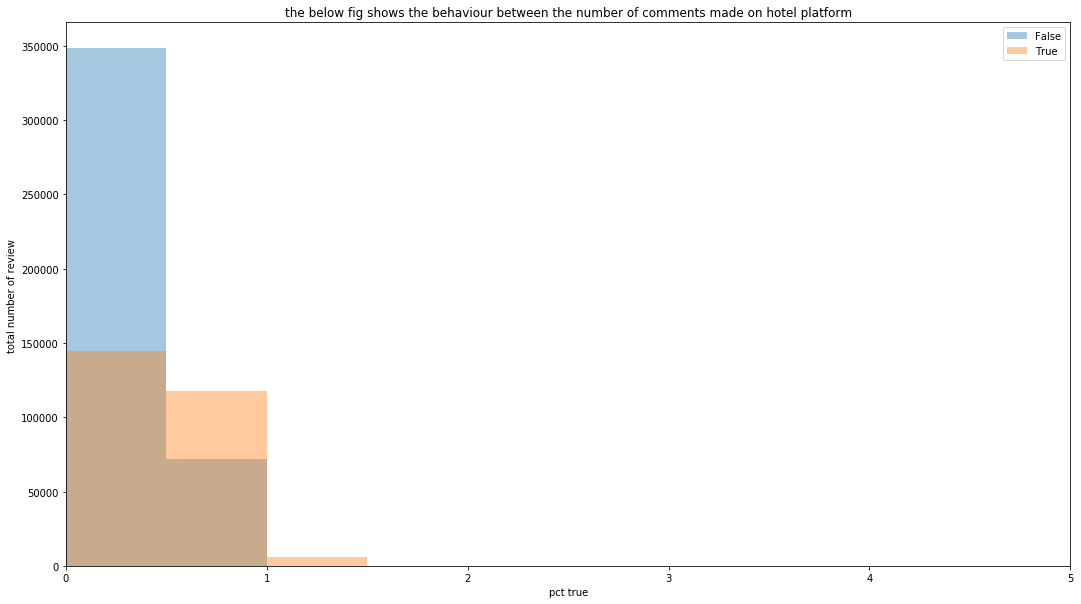

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bins = np.arange(0, 48, 0.5)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==0]['pctTrue'], label='False', ax=ax, kde=False, bins=bins)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==1]['pctTrue'], label='True', ax=ax, kde=False, bins=bins)
g.set_xlim(left=0, right=5)
g.legend()
plt.title("the below fig shows the behaviour between the number of comments made on hotel platform")
plt.xlabel('pct true')
plt.ylabel('total number of review ')

Text(0, 0.5, 'Total number of review ')

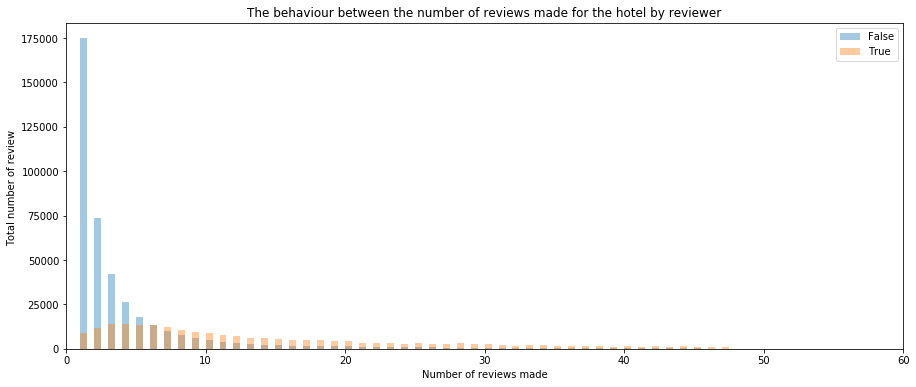

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
bins = np.arange(0, 48, 0.5)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==0]['hote_count_overall'], label='False', ax=ax, kde=False, bins=bins)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==1]['hote_count_overall'], label='True', ax=ax, kde=False, bins=bins)
g.set_xlim(left=0, right=60)
g.legend()
plt.title("The behaviour between the number of reviews made for the hotel by reviewer")
plt.xlabel('Number of reviews made')
plt.ylabel('Total number of review ')

Text(0, 0.5, 'total number of review ')

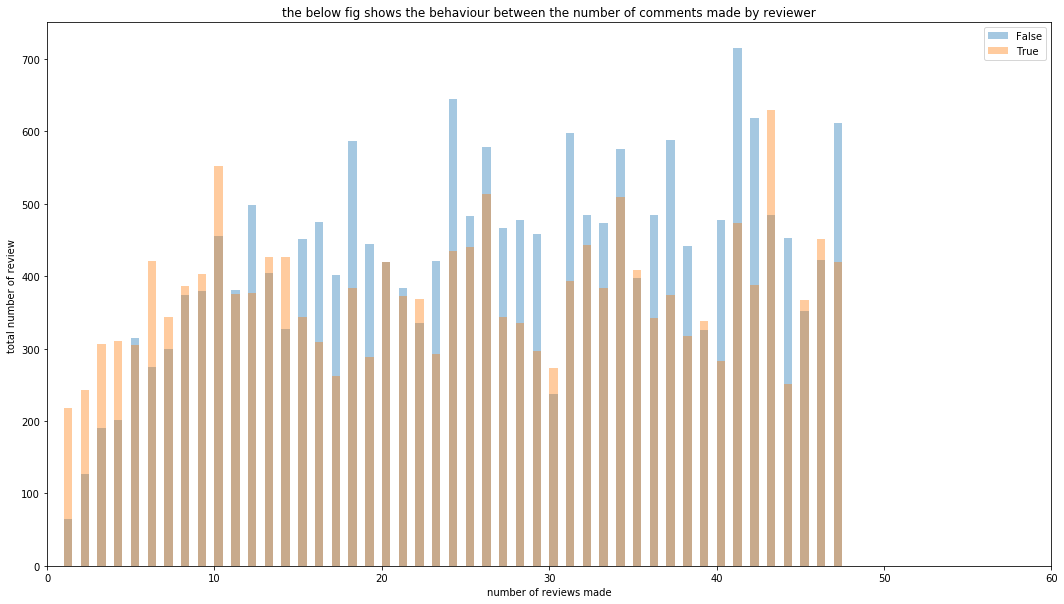

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bins = np.arange(0, 48, 0.5)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==0]['reviewCount'], label='False', ax=ax, kde=False, bins=bins)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==1]['reviewCount'], label='True', ax=ax, kde=False, bins=bins)
g.set_xlim(left=0, right=60)
g.legend()
plt.title("the below fig shows the behaviour between the number of comments made by reviewer")
plt.xlabel('number of reviews made')
plt.ylabel('total number of review ')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
bins = np.arange(0, 48, 0.5)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==0]['reviewCount'], label='False', ax=ax, kde=False, bins=bins)
g = sns.distplot(df_merged_onehot[df_merged_onehot['flagged']==1]['reviewCount'], label='True', ax=ax, kde=False, bins=bins)
g.set_xlim(left=0, right=60)
g.legend()
plt.title("the below fig shows the behaviour between the number of comments made by reviewer")
plt.xlabel('number of reviews made')
plt.ylabel('total number of review ')

In [41]:
# balanced the dataset between true and false review 
# for the moment we only sample 100000 data

In [19]:
from sklearn.utils import resample

df_majority = df_merged_onehot[df_merged_onehot.flagged==0]
df_minority = df_merged_onehot[df_merged_onehot.flagged==1]

# Upsample minority class
df_false_upsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=42) # reproducible results

# Upsample minority class
df_true_upsampled = resample(df_minority, 
                                 replace=False,     # sample with replacement
                                 n_samples=100000,    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_false_upsampled, df_true_upsampled])

# Display new class counts
df_upsampled.flagged.value_counts()

True     100000
False    100000
Name: flagged, dtype: int64

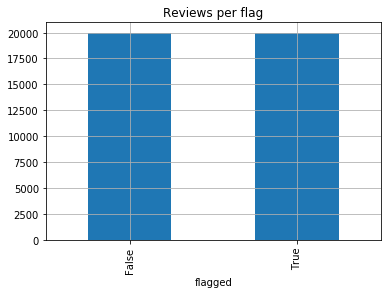

In [9]:
# Amount of reviews per flag.
plt.figure(); df_upsampled['flagged'].groupby(df_upsampled['flagged']).count().plot(kind="bar"); 
plt.title('Reviews per flag'); plt.grid(); plt.show()

[0.01153199 0.00903658 0.00824626 0.00921709 0.00941513 0.00882003
 0.00929471 0.01129328 0.00181151 0.00209148 0.00310355 0.003767
 0.00345398 0.00333051 0.00392757 0.00329881 0.00362846 0.00352448
 0.00369674 0.00359288 0.01611221 0.02664058 0.49444581 0.00594098
 0.00804393 0.00731474 0.0125148  0.02075863 0.0265555  0.01942166
 0.04524518 0.06161861 0.0086306  0.0086418  0.04751053 0.0091818
 0.00813952 0.00796835 0.00800444 0.00822788 0.00820433 0.00826405
 0.00838583 0.0081462 ]


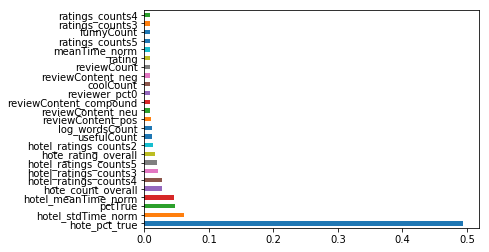

In [42]:
y = df_upsampled['flagged']
X = df_upsampled.drop(columns='flagged')
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [43]:
feat_importances.sort_values(ascending=False)

hote_pct_true               0.494446
hotel_stdTime_norm          0.061619
pctTrue                     0.047511
hotel_meanTime_norm         0.045245
hote_count_overall          0.026641
hotel_ratings_counts4       0.026556
hotel_ratings_counts3       0.020759
hotel_ratings_counts5       0.019422
hote_rating_overall         0.016112
hotel_ratings_counts2       0.012515
usefulCount                 0.011532
log_wordsCount              0.011293
reviewContent_pos           0.009415
reviewContent_neu           0.009295
reviewContent_compound      0.009217
reviewer_pct0               0.009182
coolCount                   0.009037
reviewContent_neg           0.008820
reviewCount                 0.008642
rating                      0.008631
meanTime_norm               0.008386
ratings_counts5             0.008264
funnyCount                  0.008246
ratings_counts3             0.008228
ratings_counts4             0.008204
stdTime_norm                0.008146
reviewer_gap_zero_counts    0.008140
h

Text(0, 0.5, 'Total number of review ')

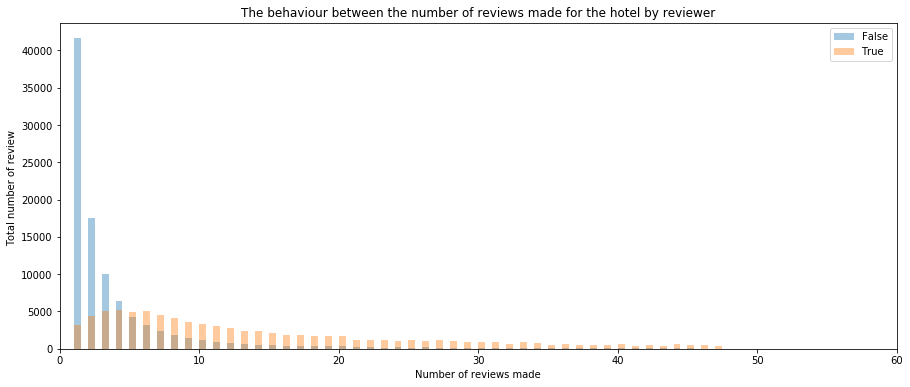

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
bins = np.arange(0, 48, 0.5)
g = sns.distplot(df_upsampled[df_upsampled['flagged']==0]['hote_count_overall'], label='False', ax=ax, kde=False, bins=bins)
g = sns.distplot(df_upsampled[df_upsampled['flagged']==1]['hote_count_overall'], label='True', ax=ax, kde=False, bins=bins)
g.set_xlim(left=0, right=60)
g.legend()
plt.title("The behaviour between the number of reviews made for the hotel by reviewer")
plt.xlabel('Number of reviews made')
plt.ylabel('Total number of review ')

In [ ]:
# build a random forest classfier model

In [22]:
from sklearn.ensemble import RandomForestClassifier
y = df_upsampled['flagged']
X = df_upsampled.drop(columns='flagged')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model1 = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=1000)
model1.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, StratifiedKFold
scores = cross_val_score(model1, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.92 (+/- 0.00)


NameError: name 'model' is not defined

In [23]:
scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 macro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1 macro: 0.92 (+/- 0.00)


In [26]:
y_pred = model1.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28781  4032]
 [ 1434 31753]]
              precision    recall  f1-score   support

       False       0.95      0.88      0.91     32813
        True       0.89      0.96      0.92     33187

    accuracy                           0.92     66000
   macro avg       0.92      0.92      0.92     66000
weighted avg       0.92      0.92      0.92     66000



Confusion matrix, without normalization
[[28781  4032]
 [ 1434 31753]]
Normalized confusion matrix
[[0.87712187 0.12287813]
 [0.04320969 0.95679031]]


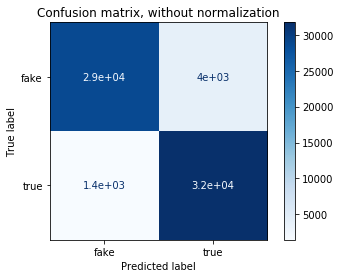

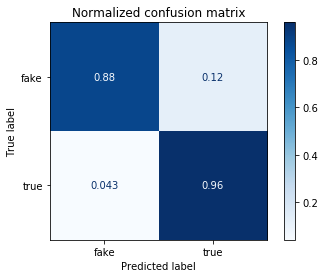

In [36]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
class_names = ['fake','true']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

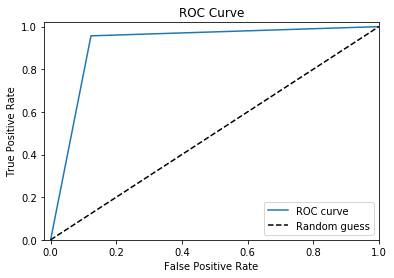

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9169560909435668

In [ ]:
# classifier model based on decision forest classifier

In [28]:
y = df_upsampled['flagged']
X = df_upsampled.drop(columns='flagged')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
scores = cross_val_score(model2, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 macro: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#graph.render("tree")

Accuracy: 0.88 (+/- 0.01)
F1 macro: 0.88 (+/- 0.01)


In [31]:
y_pred1 = model2.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[29050  3763]
 [ 4258 28929]]
              precision    recall  f1-score   support

       False       0.87      0.89      0.88     32813
        True       0.88      0.87      0.88     33187

    accuracy                           0.88     66000
   macro avg       0.88      0.88      0.88     66000
weighted avg       0.88      0.88      0.88     66000



In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

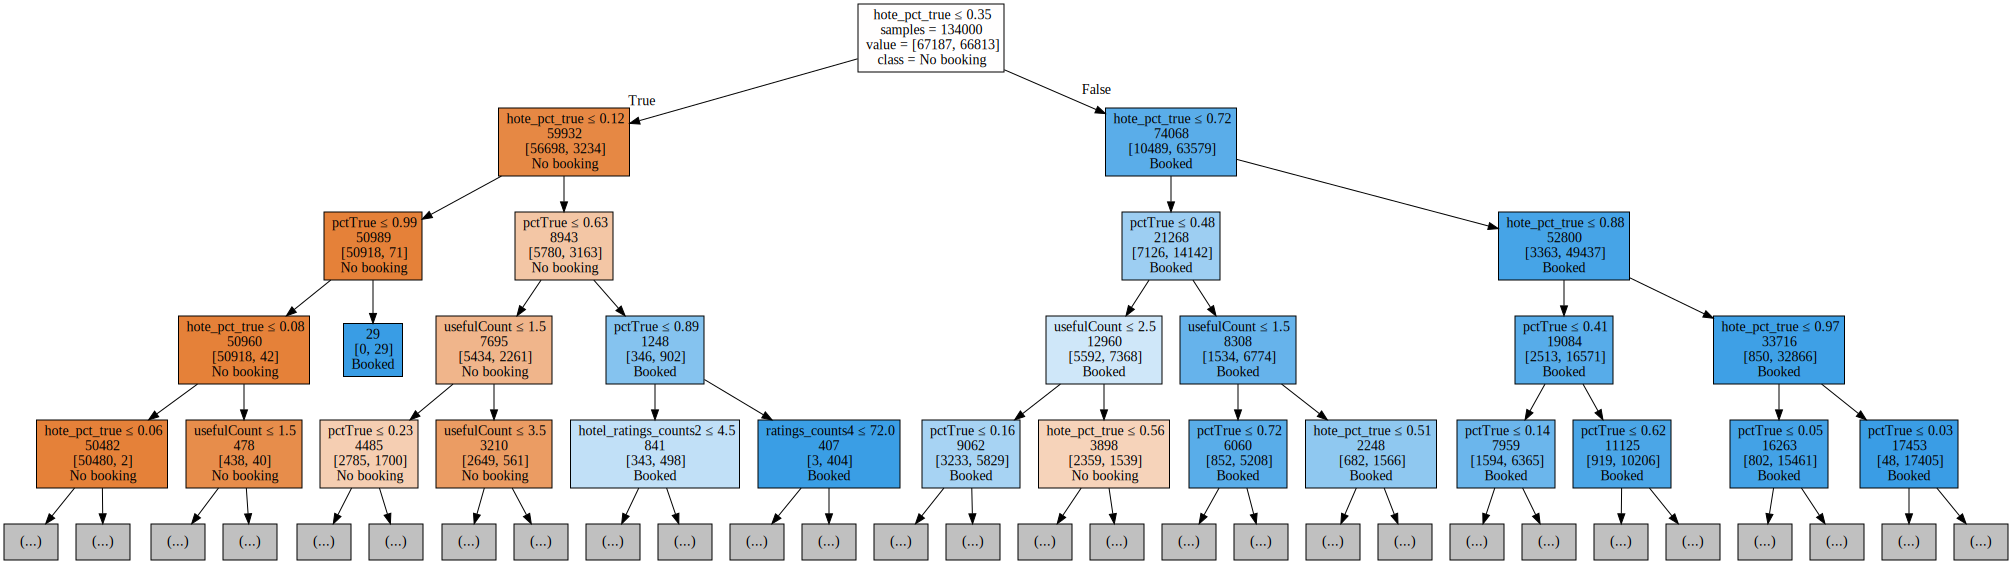

In [61]:
import graphviz
from sklearn import tree
# in line function for small trees
dot_data = tree.export_graphviz(model2, out_file=None,
feature_names=X.columns.tolist(),
class_names=["No booking","Booked"],
filled=True, rounded=False, precision=2, label='root', impurity=False,
special_characters=True, max_depth=4)
graph = graphviz.Source(dot_data)
graph
#graph.format = 'png'